In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import warnings
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

warnings.filterwarnings('ignore')
os.chdir("C:/Users/dzl19/Box/6-2024 Spring/statistical learning/final project/")

In [89]:
df=pd.read_csv('input/bird.csv')
df.head()
df

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,SW
1,1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW
2,2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW
3,3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW
4,4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW
...,...,...,...,...,...,...,...,...,...,...,...,...
415,415,17.96,1.63,19.25,1.33,18.36,1.54,31.25,1.33,21.99,1.15,SO
416,416,19.21,1.64,20.76,1.49,19.24,1.45,33.21,1.28,23.60,1.15,SO
417,417,18.79,1.63,19.83,1.53,20.96,1.43,34.45,1.41,22.86,1.21,SO
418,418,20.38,1.78,22.53,1.50,21.35,1.48,36.09,1.53,25.98,1.24,SO


<Axes: >

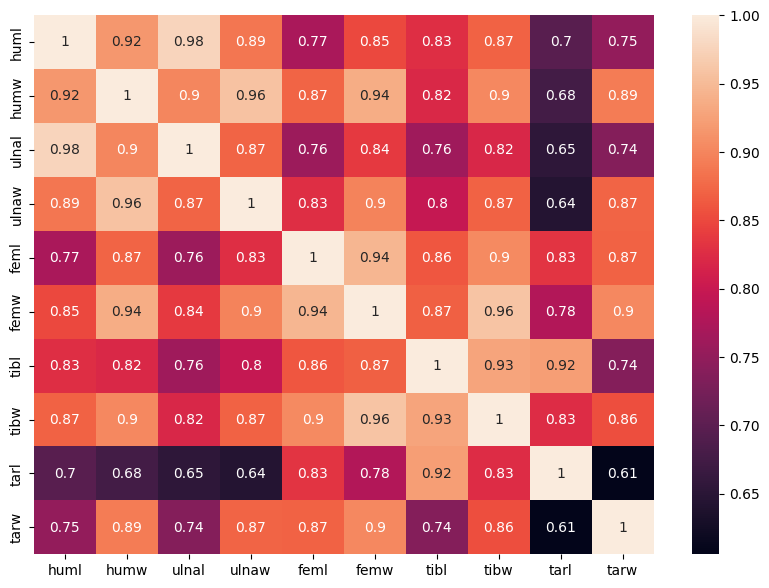

In [90]:
plt.figure(figsize=(10,7))
sns.heatmap(df.iloc[:,1:-1].corr(), annot=True)

In [91]:
# drop the redundant columns (corr coefficient > 0.93)
df = df.drop(columns=['ulnal','ulnaw','femw','tibw'])
df

,id,huml,humw,feml,tibl,tarl,tarw,type
0,0,80.78,6.68,41.81,5.50,38.70,3.84,SW
1,1,88.91,6.63,47.04,80.22,41.50,4.01,SW
2,2,79.97,6.37,43.07,75.35,38.31,3.34,SW
3,3,77.65,5.70,40.04,69.17,35.78,3.41,SW
4,4,62.80,4.84,33.95,56.27,31.88,3.13,SW
...,...,...,...,...,...,...,...,...
415,415,17.96,1.63,18.36,31.25,21.99,1.15,SO
416,416,19.21,1.64,19.24,33.21,23.60,1.15,SO
417,417,18.79,1.63,20.96,34.45,22.86,1.21,SO
418,418,20.38,1.78,21.35,36.09,25.98,1.24,SO


In [92]:
# find all trehe rows containing missing values and drop these rows
df_clean = df.dropna(thresh=df.shape[1])
df_clean

,id,huml,humw,feml,tibl,tarl,tarw,type
0,0,80.78,6.68,41.81,5.50,38.70,3.84,SW
1,1,88.91,6.63,47.04,80.22,41.50,4.01,SW
2,2,79.97,6.37,43.07,75.35,38.31,3.34,SW
3,3,77.65,5.70,40.04,69.17,35.78,3.41,SW
4,4,62.80,4.84,33.95,56.27,31.88,3.13,SW
...,...,...,...,...,...,...,...,...
415,415,17.96,1.63,18.36,31.25,21.99,1.15,SO
416,416,19.21,1.64,19.24,33.21,23.60,1.15,SO
417,417,18.79,1.63,20.96,34.45,22.86,1.21,SO
418,418,20.38,1.78,21.35,36.09,25.98,1.24,SO


<Axes: >

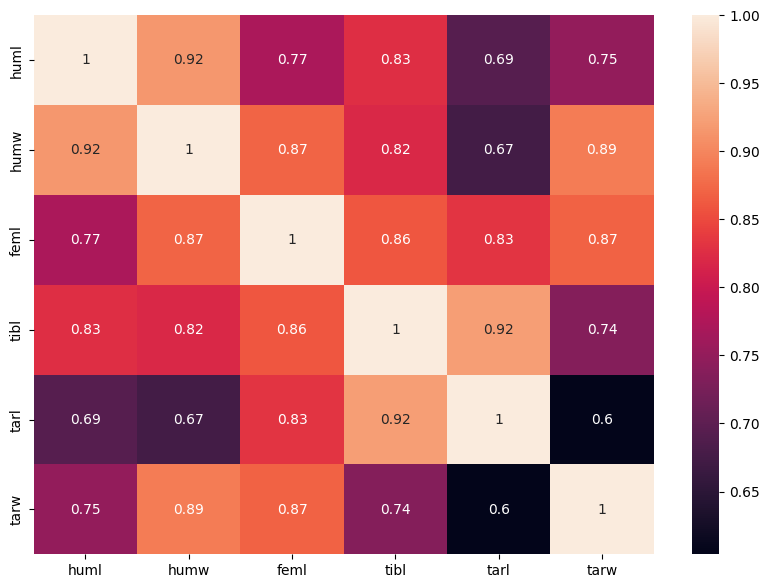

In [93]:
plt.figure(figsize=(10,7))
sns.heatmap(df_clean.iloc[:,1:-1].corr(), annot=True)

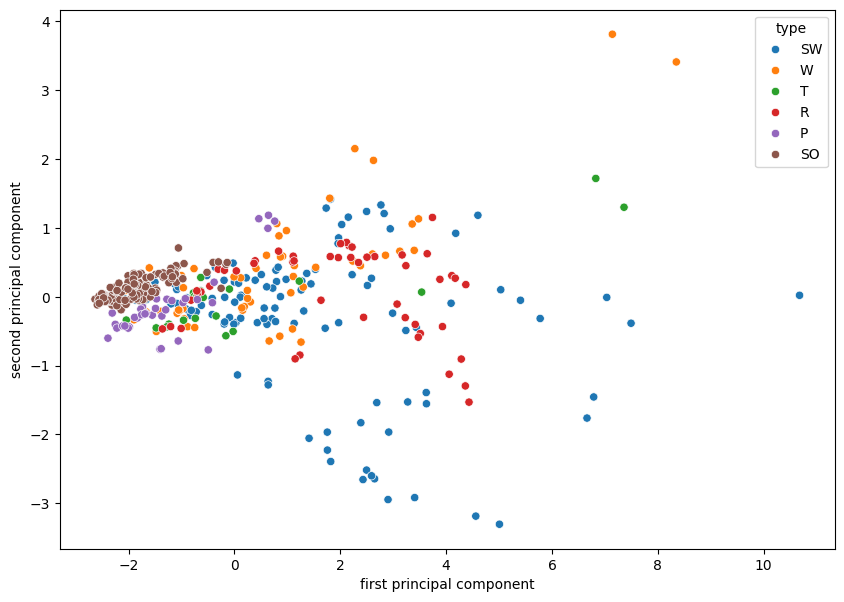

In [94]:
# PCA

# scale all the variables
sc=StandardScaler()
df_sc=sc.fit_transform(df_clean.iloc[:,1:-1].values)

pca=PCA()
df_pc=pca.fit_transform(df_sc)

plt.figure(figsize=(10,7));
sns.scatterplot(x=df_pc[:,0],y=df_pc[:,1],hue=df_clean['type'])
plt.xlabel('first principal component');
plt.ylabel('second principal component');

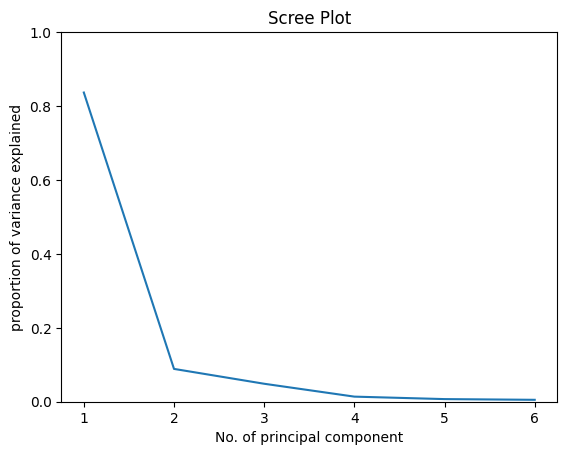

In [95]:
sns.lineplot(x=np.arange(pca.components_.shape[0])+1, 
             y=pca.explained_variance_ratio_);
plt.ylim(0.0,1.0);
plt.title('Scree Plot');
plt.xlabel('No. of principal component');
plt.ylabel('proportion of variance explained');

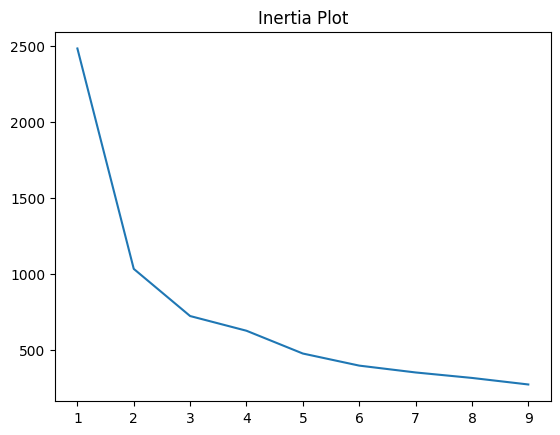

In [96]:
# K-means Clustering

# looking for optimal cluster number
inertia=[]
for i in range(1,10):
    km=KMeans(n_clusters=i, random_state=33)
    km.fit(df_sc)
    inertia.append(km.inertia_)
# inertia plot
sns.lineplot(x=range(1,10),y=inertia);
plt.title('Inertia Plot');

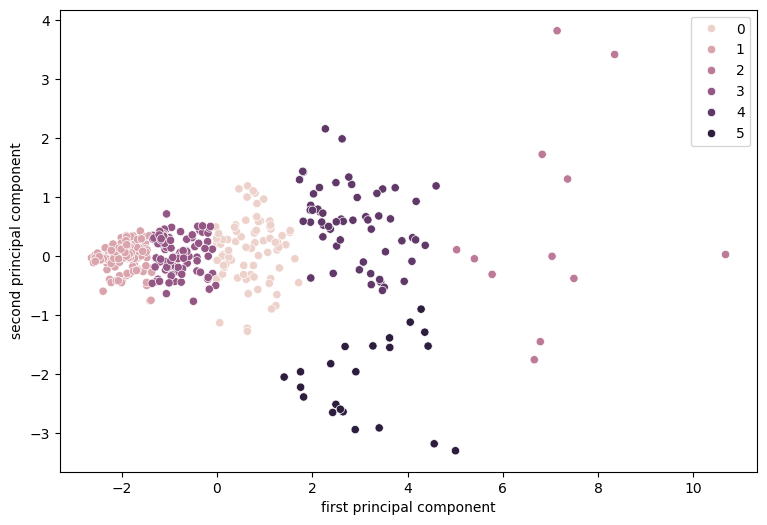

In [97]:
km=KMeans(n_clusters=6, random_state=33)
clusters=km.fit_predict(df_sc)

#visualize clusters on PCA data
plt.figure(figsize=(9,6));
sns.scatterplot(x=df_pc[:,0],y=df_pc[:,1],hue=clusters)
plt.xlabel('first principal component');
plt.ylabel('second principal component');

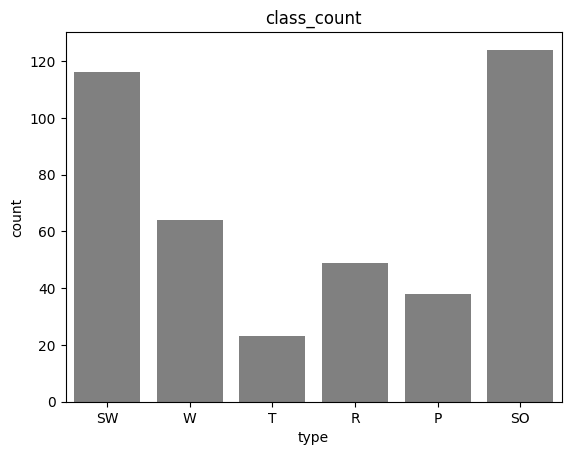

In [98]:
# whether the sample is balanced
plt.title('class_count');
sns.countplot(x='type', data=df_clean, color='grey');

In [99]:
enc=LabelEncoder()
y=enc.fit_transform(df_clean['type'])

# the original sample is imbalanced
# resampling the dataset by oversampling the minority classes
# duplicating samples from minority classes
majority_class=np.argmax(np.bincount(y))
length_majority_class = np.max(np.bincount(y))
additional_samples=np.array([])
additional_labels=np.array([])

for i in np.unique(y):

    if i != majority_class:
        length_this_class=np.bincount(y)[i]
        wanted=length_majority_class-length_this_class
        print('class:',i)
        print('%d additional samples' % wanted)
        indexes=np.argwhere(y==i)
        indexes=np.reshape(indexes, (len(indexes),))
        choices=np.random.choice(indexes,size=wanted)
        temp_x=df_sc[choices]
        additional_samples=np.append(additional_samples,temp_x, axis=None)
        additional_labels=np.append(additional_labels,np.full(wanted,i), axis=None)

additional_samples=np.reshape(additional_samples,(int(len(additional_samples)/6),6))
print('new_samples.shape=', additional_samples.shape)
print('new_labels.shape=', additional_labels.shape)

flat_x = np.append(df_sc,additional_samples)
x_columns_number = df_sc.shape[1]
new_row_number = int(len(flat_x)/x_columns_number)
df_sc1 = np.reshape(flat_x,(new_row_number,x_columns_number))

#new y --> y1
flat_y = np.append (y, additional_labels)
new_shape = (len(y)+len(additional_labels),)
y1 = np.reshape(flat_y, new_shape)
y1 = y1.astype('int64')

print ('df_sc1.shape=',df_sc1.shape)
print ('y1.shape=',y1.shape)
print('')
print('number of samples for each class, before resampling:', np.bincount(y))
print('number of samples for each class, after resampling: ', np.bincount(y1))

class: 0
86 additional samples
class: 1
75 additional samples
class: 3
8 additional samples
class: 4
101 additional samples
class: 5
60 additional samples
new_samples.shape= (330, 6)
new_labels.shape= (330,)
df_sc1.shape= (744, 6)
y1.shape= (744,)

number of samples for each class, before resampling: [ 38  49 124 116  23  64]
number of samples for each class, after resampling:  [124 124 124 124 124 124]


In [100]:
# create training and test datasets
x_tr1, x_ts, y_tr1, y_ts=train_test_split(df_sc1,y1,random_state=42)

,algorithm,accuracy,precision,recall
0,GNB,0.456989,0.522646,0.451829


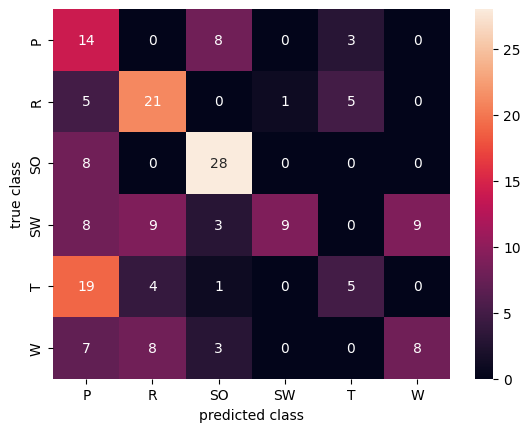

In [110]:
# Training on new balanced train dataset
results=pd.DataFrame([], columns=['algorithm','accuracy','precision','recall'])

# Naive Bayes
gnb=GaussianNB()
gnb.fit(x_tr1,y_tr1)
y_pred=gnb.predict(x_ts)
accuracy=accuracy_score(y_ts,y_pred)
precision=precision_score(y_ts,y_pred, average='macro')
recall=recall_score(y_ts,y_pred, average='macro')
nb=pd.DataFrame([['GNB', accuracy, precision, recall]],columns=list(results.columns))
results=pd.concat([results,nb])

# plotting for the classification of each class
sns.heatmap(confusion_matrix(y_ts,y_pred),xticklabels= enc.classes_,
            yticklabels=enc.classes_, annot=True,fmt='d');
plt.ylabel('true class')
plt.xlabel('predicted class')

results

,algorithm,accuracy,precision,recall
0,GNB,0.456989,0.522646,0.451829
0,KNN,0.838710,0.833622,0.839302


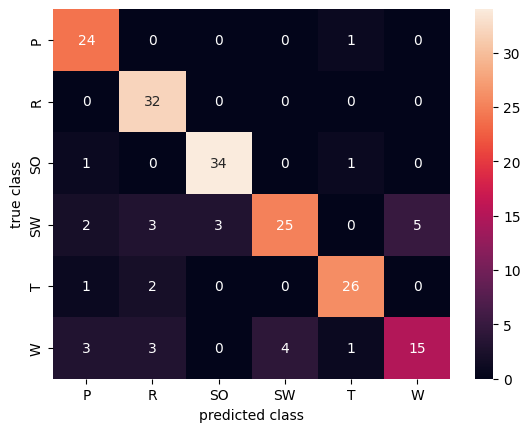

In [111]:
#KNN
knn=KNeighborsClassifier()
knn.fit(x_tr1,y_tr1)
y_pred=knn.predict(x_ts)
accuracy=accuracy_score(y_ts,y_pred)
precision=precision_score(y_ts,y_pred, average='macro')
recall=recall_score(y_ts,y_pred, average='macro')
knn=pd.DataFrame([['KNN', accuracy, precision, recall]],columns=list(results.columns))
results=pd.concat([results,knn])

# plotting for the classification of each class
sns.heatmap(confusion_matrix(y_ts,y_pred),xticklabels= enc.classes_,
            yticklabels=enc.classes_, annot=True,fmt='d');
plt.ylabel('true class')
plt.xlabel('predicted class')

results

,algorithm,accuracy,precision,recall
0,GNB,0.456989,0.522646,0.451829
0,KNN,0.838710,0.833622,0.839302
0,SVM,0.698925,0.693359,0.689167


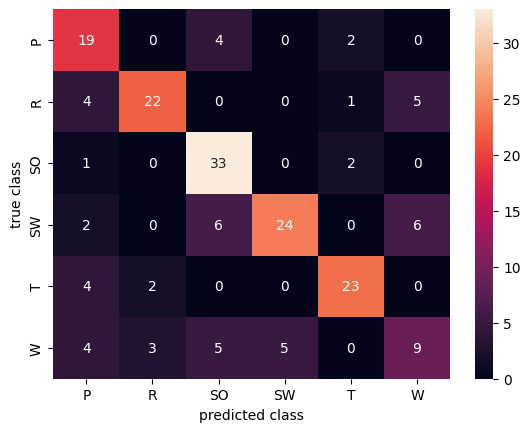

In [112]:
#SVM
svm=SVC()
svm.fit(x_tr1,y_tr1)
y_pred=svm.predict(x_ts)
accuracy=accuracy_score(y_ts,y_pred)
precision=precision_score(y_ts,y_pred, average='macro')
recall=recall_score(y_ts,y_pred, average='macro')
svm=pd.DataFrame([['SVM', accuracy, precision, recall]],columns=list(results.columns))
results=pd.concat([results,svm])

# plotting for the classification of each class
sns.heatmap(confusion_matrix(y_ts,y_pred),xticklabels= enc.classes_,
            yticklabels=enc.classes_, annot=True,fmt='d');
plt.ylabel('true class')
plt.xlabel('predicted class')

results

,algorithm,accuracy,precision,recall
0,GNB,0.456989,0.522646,0.451829
0,KNN,0.838710,0.833622,0.839302
0,SVM,0.698925,0.693359,0.689167
0,LR,0.709677,0.735125,0.709890


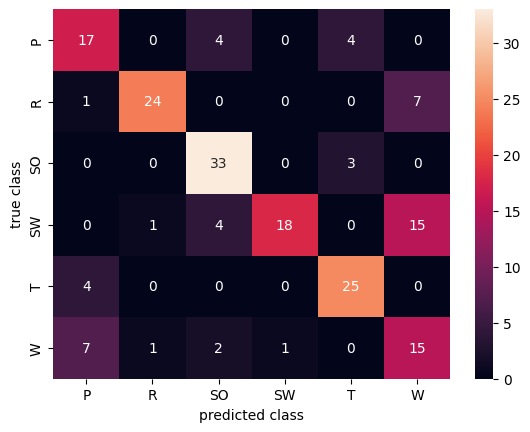

In [113]:
#Logistic Regression
lr1=LogisticRegression()
lr1.fit(x_tr1,y_tr1)
y_pred=lr1.predict(x_ts)
accuracy=accuracy_score(y_ts,y_pred)
precision=precision_score(y_ts,y_pred, average='macro')
recall=recall_score(y_ts,y_pred, average='macro')
logReg=pd.DataFrame([['LR', accuracy, precision, recall]],columns=list(results.columns))
results=pd.concat([results,logReg])

# plotting for the classification of each class
sns.heatmap(confusion_matrix(y_ts,y_pred),xticklabels= enc.classes_,
            yticklabels=enc.classes_, annot=True,fmt='d');
plt.ylabel('true class')
plt.xlabel('predicted class')

results

,algorithm,accuracy,precision,recall
0,GNB,0.456989,0.522646,0.451829
0,KNN,0.838710,0.833622,0.839302
0,SVM,0.698925,0.693359,0.689167
0,LR,0.709677,0.735125,0.709890
0,RF,0.903226,0.901815,0.905454


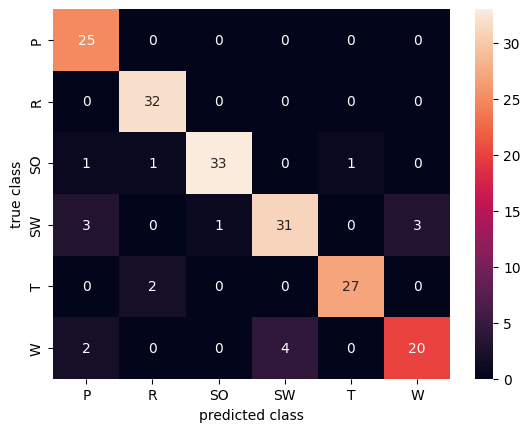

In [114]:
#Random Forest
rf=RandomForestClassifier(n_estimators=1000, max_depth=7, random_state=42)
rf.fit(x_tr1,y_tr1)
y_pred=rf.predict(x_ts)
accuracy=accuracy_score(y_ts,y_pred)
precision=precision_score(y_ts,y_pred, average='macro')
recall=recall_score(y_ts,y_pred, average='macro')
RdFrst=pd.DataFrame([['RF', accuracy, precision, recall]],columns=list(results.columns))
results=pd.concat([results,RdFrst])

# plotting for the classification of each class
sns.heatmap(confusion_matrix(y_ts,y_pred),xticklabels= enc.classes_,
            yticklabels=enc.classes_, annot=True,fmt='d');
plt.ylabel('true class')
plt.xlabel('predicted class')

results

In [118]:
results.style.hide()

algorithm,accuracy,precision,recall
GNB,0.456989,0.522646,0.451829
KNN,0.838710,0.833622,0.839302
SVM,0.698925,0.693359,0.689167
LR,0.709677,0.735125,0.709890
RF,0.903226,0.901815,0.905454
